<a href="https://colab.research.google.com/github/Aman7Rathore/Spam-Classifier-Using-NLP/blob/main/Spam_Classifier_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import sklearn

In [53]:
mssgs = pd.read_csv('/content/drive/MyDrive/SMSSpamCollection',sep='\t',names = ["labels","messages"])

In [54]:
mssgs.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
import re
import nltk

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [58]:
ps = PorterStemmer()

In [59]:
corpus = []
for i in range(0,len(mssgs)):
  review = re.sub('[a-zA-Z]',' ',mssgs['messages'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [60]:
#USe TF-IDF for converting to vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

In [61]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
y = pd.get_dummies(mssgs['labels'])

In [65]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [64]:
y = y.iloc[:,1].values

In [67]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [68]:
# Fit The Algorithm
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
spam_detect_model = MNB.fit(X_train,y_train) 

In [69]:
y_pred = spam_detect_model.predict(X_test)

In [83]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [84]:
accuracy_score(y_test,y_pred)

0.884304932735426

In [85]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      1.00      0.94       962\n           1       1.00      0.16      0.27       153\n\n    accuracy                           0.88      1115\n   macro avg       0.94      0.58      0.60      1115\nweighted avg       0.90      0.88      0.85      1115\n'

In [86]:
roc_auc_score(y_test,y_pred)

0.5784313725490196

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


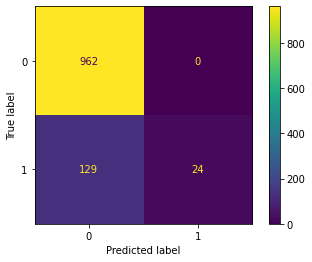

In [87]:
metrics.plot_confusion_matrix(spam_detect_model,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


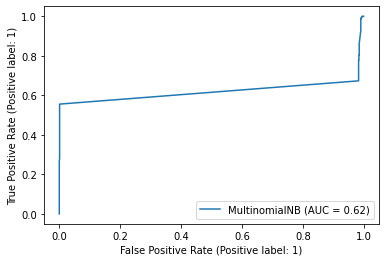

In [89]:
metrics.plot_roc_curve(spam_detect_model,X_test,y_test)